In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
import cv2
import os

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
import cv2
import os

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
import cv2
import os

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
import cv2
import os

In [11]:
img = image.load_img("C:\\Users\\noela\\OneDrive\\Desktop\\Computer vision\\Basedata\\Training\\bad_contrast\\116_surveyor7_mosaic.jpg")

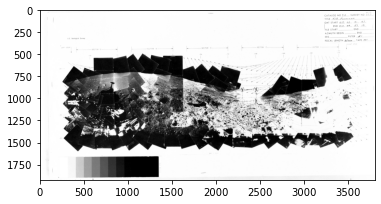

In [12]:
plt.imshow(img)

In [13]:
cv2.imread("C:\\Users\\noela\\OneDrive\\Desktop\\Computer vision\\Basedata\\Training\\bad_contrast\\116_surveyor7_mosaic.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [252, 252, 252],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [15]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [18]:
train_dataset=train.flow_from_directory('C:\\Users\\noela\\OneDrive\\Desktop\\Computer vision\\Basedata\\Training',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode= 'binary')
validation_dataset=train.flow_from_directory('C:\\Users\\noela\\OneDrive\\Desktop\\Computer vision\\Basedata\\Validation',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode= 'binary')

Found 27 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy']
             )
             

In [29]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch = 3,
                    epochs= 30,
                    validation_data= validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 318ms/step - loss: 0.5052 - accuracy: 0.8889
Epoch 2/30
3/3 [==============================] - 1s 302ms/step - loss: 0.5483 - accuracy: 0.7778
Epoch 3/30
3/3 [==============================] - 1s 283ms/step - loss: 0.1946 - accuracy: 0.8889
Epoch 4/30
3/3 [==============================] - 1s 302ms/step - loss: 0.3254 - accuracy: 0.8889
Epoch 5/30
3/3 [==============================] - 1s 291ms/step - loss: 0.5647 - accuracy: 0.7778
Epoch 6/30
3/3 [==============================] - 1s 264ms/step - loss: 0.5387 - accuracy: 0.8889
Epoch 7/30
3/3 [==============================] - 1s 267ms/step - loss: 0.3854 - accuracy: 0.8889
Epoch 8/30
3/3 [==============================] - 1s 291ms/step - loss: 0.1557 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================] - 1s 290ms/step - loss: 0.2809 - accuracy: 0.7778
Epoch 10/30
3/3 [==============================] - 1s 275ms/step - loss: 0.1341 - accuracy: 1.0000
Epoch 11/30
3/3 [==

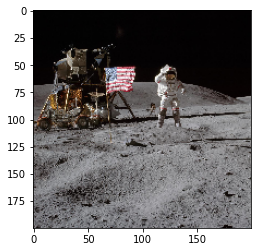

acceptable image quality


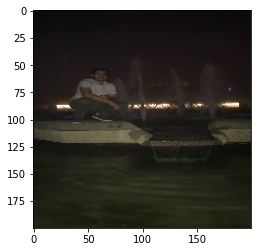

nonacceptable image quality


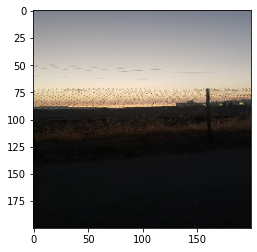

nonacceptable image quality


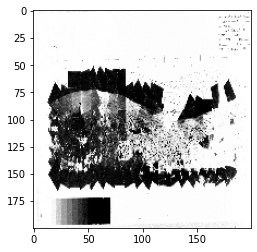

nonacceptable image quality


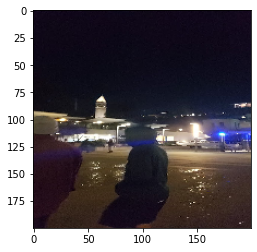

nonacceptable image quality


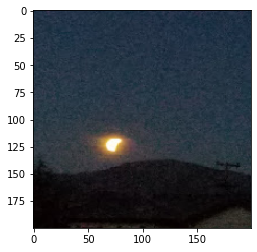

nonacceptable image quality


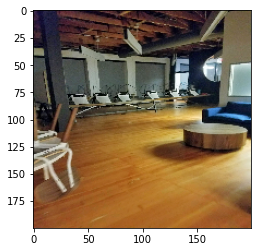

acceptable image quality


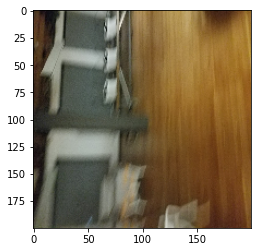

nonacceptable image quality


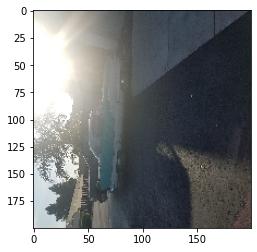

nonacceptable image quality


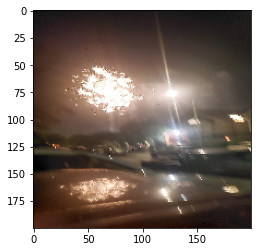

nonacceptable image quality


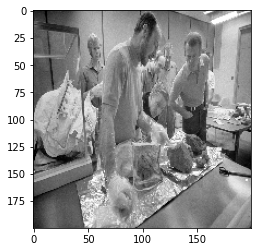

acceptable image quality


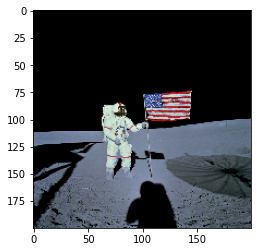

acceptable image quality


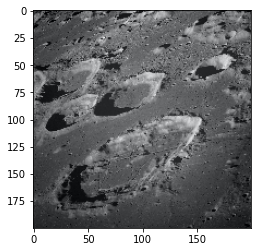

acceptable image quality


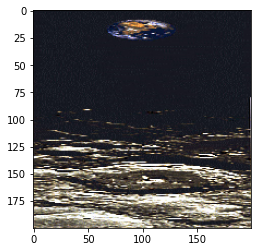

nonacceptable image quality


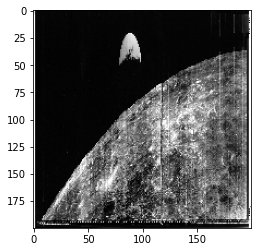

nonacceptable image quality


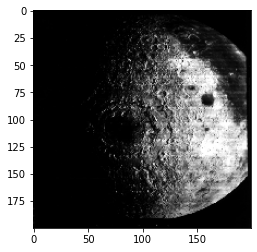

nonacceptable image quality


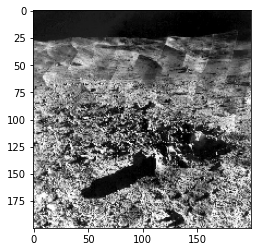

acceptable image quality


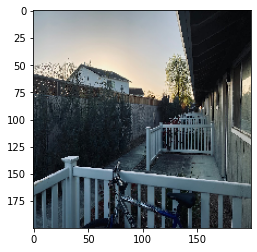

nonacceptable image quality


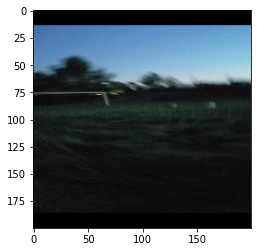

nonacceptable image quality


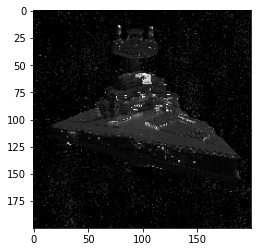

nonacceptable image quality


In [51]:
dir_path = 'C:\\Users\\noela\\OneDrive\\Desktop\\Computer vision\\Basedata\\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0: 
        print ("nonacceptable image quality")
    else:
        print ("acceptable image quality")
    
    
    